In [10]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
def powerLaw(t, n):
    #Given the customer's age and power of the probability 
    #returns the expected number of users invited.
    return float(1)/math.pow(t,n)

In [2]:
def computeNewUsersNoS(initialCohort, generations, n, alpha):
        #Given an initial chort size and age dependent virality, 
        #computes the expected cohorts for the next generations.
        cohorts=[initialCohort]
        for g in range(generations):
            L=len(cohorts)
            newCohort=[]
            for t in range(L):
                newCohort.append(alpha*cohorts[L-t-1]*powerLaw(t+1, n))
            cohorts.append(sum(newCohort))
        return cohorts
    
#Need to show this step by step graphically in slides

In [3]:
def computeNewUsers(initialCohort, generations, n, alpha, S):
# Includes saturation to limit the amount that virality can grow indefinitely
        cohorts=[initialCohort]
        for g in range(generations):
            L=len(cohorts)
            newCohort=[]
            for t in range(L):
                newCohort.append(alpha*cohorts[L-t-1]*powerLaw(t+1, n)*float((S-sum(cohorts)))/(S))
            cohorts.append(sum(newCohort))
        return cohorts
    

In [8]:
aa=computeNewUsersNoS(1000,100, 2.1, 0.67)
bb=computeNewUsersNoS(1000,100, 2.1, 0.65)
cc=computeNewUsersNoS(1000,100, 2.1, 0.6)

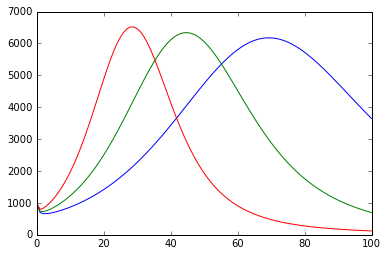

In [19]:


plt.plot(aa)
plt.plot(bb)
plt.plot(cc)
plt.show()

In [30]:
aa=computeNewUsersNoS(1000,100, 1.9, 0.595)
bb=computeNewUsersNoS(1000,100, 2.1, 0.65)
cc=computeNewUsersNoS(1000,100, 2.3, 0.7)

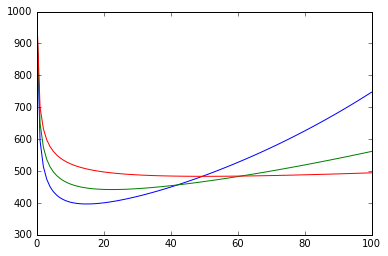

In [31]:
plt.plot(aa)
plt.plot(bb)
plt.plot(cc)
plt.show()

In [12]:
aa=computeNewUsers(1000,100, 2, 0.7, 2000000)
bb=computeNewUsers(1000,100, 2, 0.74, 1000000)
cc=computeNewUsers(1000,100, 2, 0.8, 500000)

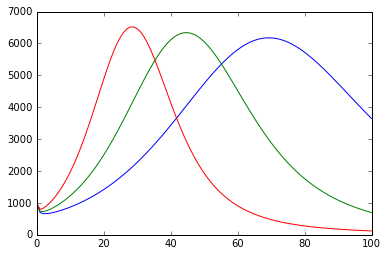

In [33]:
plt.plot(aa)
plt.plot(bb)
plt.plot(cc)
plt.show()

In [11]:
def computeDAU(cohorts, n):
    L = len(cohorts)
    DAU = [cohorts[1]]
    for i in range(L):
        actives=[]
        for t in range(i):
            actives.append(cohorts[i-t-1]*powerLaw(t+1,n))
        DAU.append(sum(actives))
    return DAU 

In [12]:
aa=computeNewUsers(1000,300, 2, 0.7, 2000000)
sss=computeDAU(aa, 0.5)

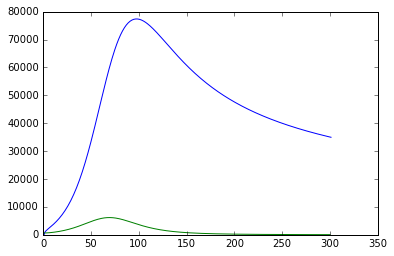

In [13]:
# This shows the DAU and the New Users per day over the first 100 days
plt.plot(sss)
plt.plot(aa)
plt.show()

In [15]:
cohort=[]
for i in range(1000):
    cohort.append(1000)

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
r1=computeDAU(cohort, 1)
r1p5=computeDAU(cohort, 1.5)
r2=computeDAU(cohort, 2)

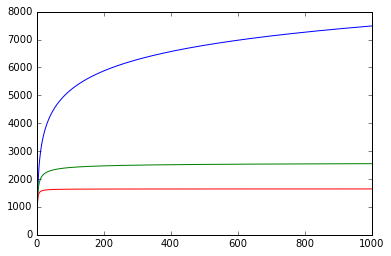

In [25]:
#Why does only a power law of -1 have no convergence???
plt.plot(r1)
plt.plot(r1p5)
plt.plot(r2)
plt.show()

In [19]:
def getChildren(V):
    if  random.random() < V:
        return 1
    else:
        return 0

In [22]:
def computeDescendants(initialCohort, gen, V):
    cohort = initialCohort
    generations = gen
    cohorts=[cohort]
    mx = 1
    for i in range(generations):
        newCohort=[]
        for j in range(cohort):
            newUsers = getChildren(V)
            newCohort.append(newUsers)
        cohort = sum(newCohort)
        cohorts.append(cohort)
    return sum(cohorts)

In [27]:
computeDescendants(10, 100, 0.9)

89

In [45]:
populations7=[]
for i in range(1000):
    populations7.append(computeDescendants(10, 100, 0.7))


In [46]:
d7 = {x:populations7.count(x) for x in populations8}

In [47]:
 x7, y7 = d7.keys(), d7.values()

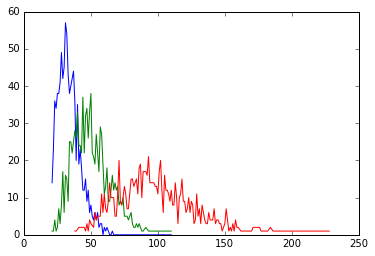

In [48]:
plt.plot(x7,y7)
plt.plot(x8,y8)
plt.plot(x,y)
plt.show()